# Introduction {#introduction}

For a very quick introduction to R, you can refer to the 
[Introduction to Econometrics 2023 course](https://feb-sofia.github.io/econometrics-2023/01-Introduction-to-R.html). @WICKHAM2016DataScienceImport offer a more thorough introduction to the tidyverse packages in their [R for data science book](https://r4ds.had.co.nz/).

In [32]:
# Package Installation with alternative approach for fable
# First install core dependencies
if (!require("tidyverse")) install.packages("tidyverse", dependencies = TRUE)

# Install time series packages step by step
essential_packages <- c(
  "xts",
  "quantmod", 
  "tsibble",
  "lubridate",
  "eurostat",
  "tsbox"
)

for (pkg in essential_packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, dependencies = TRUE)
  }
}

library(xts)
library(quantmod)
library(tsibble)
library(lubridate)
library(eurostat)


## Time Series Definition

A *time series* is a sequence of values ordered by time. This course will focus on series that take values in $\mathbb{R}$. Let
$x_1, x_2, \ldots, x_T$ be a sequence of values ordered by a time index
$t = 1,\ldots,T$. The value of the series is determined by:

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1},\quad x_0 = 10 \implies \\
x_t & = 10 \times(1 + 0.02)^{t} \\
\end{align}
$$ {#eq-geom-series}

Lets compute and plot the values of this sequence for $t = 1,\ldots,20$.

:::{.callout-note}
## Regular and Irregular Time Series

In this course we will deal with observations 
recorded at fixed time intervals (e.g. hourly, daily, weekly, monthly, annually, etc.). 
For example, _every day_ you measure your morning travel duration from home to the university.

Consider your daily step count. Let's say you copy
the number of steps at the end of the day from your
health app into a spreadsheet. Sometimes do it on Monday
evening, sometime on a Wednesday, sometimes you might miss a
couple of weeks and record it again. This would be
an example of an _irregular_ time series (of your daily step counts).
:::

## A Deterministic Time Series


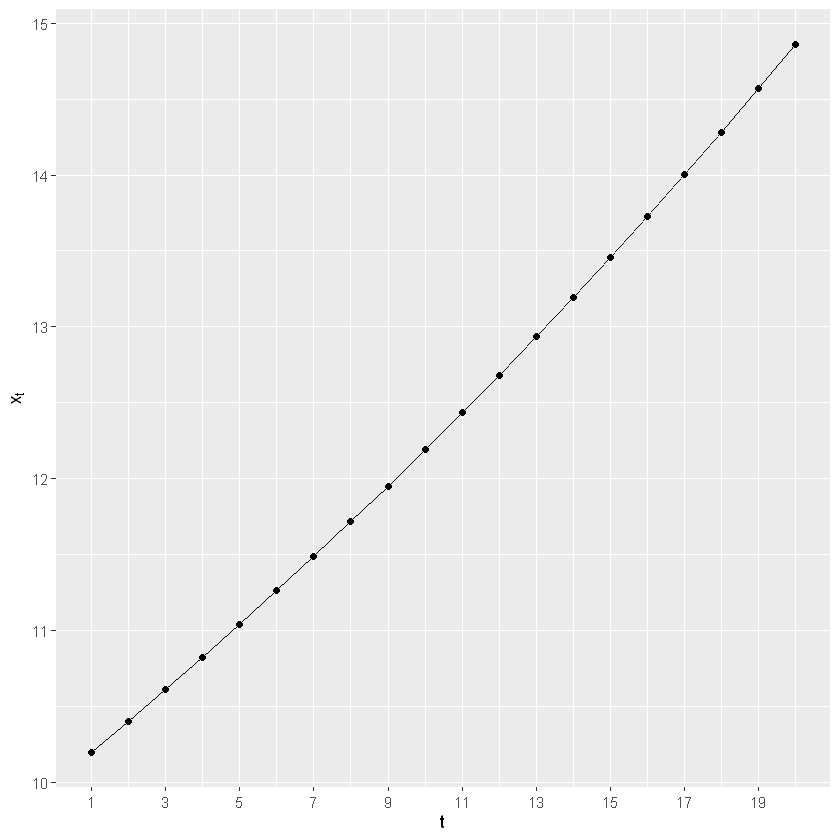

In [5]:
# Create and plot geometric series
dt <- tibble(
  tidx = 1:20,
  x = 10 *(1 + 0.02)^tidx
)

dt %>%
  ggplot(aes(x = tidx, y = x)) +
    geom_point() + 
    geom_line() + 
    scale_x_continuous(breaks = seq(1, 20, 2)) +
    labs(
      x = "t",
      y = expression(x[t])
    )

This series is an example of a *deterministic* sequence. For every point
in time $t$, you can use the formula in @eq-geom-series to compute the
value of the series, e.g.:


$$
\begin{align}
x_{0} = 10 \\
x_{7} = 1.02^{7}\times 10 \approx 11.487
\end{align}
$$

## Date and Time objects in R

Internally, dates are stored as the number of days since a (arbitrary) reference (origin). The default origin in R is the first of January 1970.

In [6]:
# Working with Date objects
origin <- as.Date("1970-01-01")
jan02.1970 <- as.Date("1970-01-02")

origin
jan02.1970

as.numeric(origin)
as.numeric(jan02.1970)

origin + 5
origin + 5:10

[1] "1970-01-01"

[1] "1970-01-02"

[1] 0

[1] 1

[1] "1970-01-06"

[1] "1970-01-06" "1970-01-07" "1970-01-08" "1970-01-09" "1970-01-10"
[6] "1970-01-11"

Time is stored as the number of seconds (and fractions of a second)
since the origin: 1970-01-01 00:00:00
[UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time). POSIX
stands for [Portable Operating System
Interface](https://en.wikipedia.org/wiki/POSIX).

In [12]:
# Check the class of the time object
class(origin_time)

[1] "POSIXct" "POSIXt"

The package `lubridate` provides utility functions for working with date
and time objects. You can look at this online guide
[here](https://lubridate.tidyverse.org/).

In [ ]:
# Working with lubridate
# Sys.time returns the current time
now <- Sys.time()

# Print the value of now
now

# Day of the month
day(now)

# Day of the week (depends on the start of week assumption and is locale dependent!)
wday(now)
wday(now, week_start = 1)

# Day of the week as string (also locale dependent)
wday(now, label = TRUE)

# Day of the year
yday(now)

# Week of the year
week(now)

# Month of the year
print("The month (number) is:")
month(now)

# Quarter of the year
quarter(now)

[1] "2025-09-25 11:17:44 GMT"

[1] 25

[1] 5

[1] 4

[1] Thu
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

[1] 268

[1] 39

[1] "The month (number) is:"


[1] 9

[1] 3

### Exercise: Date Objects in R

1. What day of the week was the 10-th of June 2019?
2. Create a sequence of 34 consecutive dates starting on the 2-nd of January 2017. What was the year quarter of the last date of this sequence?

In [ ]:
# Exercise solution space
# Type your code here

## Time Series Classes

There are several classes that are used for storing time series in
R. We will mainly focus on `tsibble`, but some functions we will encounter later in the course return or require `ts` or `xts` objects.

- `ts`
- `xts` (see the [xts vignette](https://cran.r-project.org/web/packages/xts/vignettes/xts.pdf))
- `tsibble` (see the [introduction to tsibble](https://cran.rstudio.com/web/packages/tsibble/vignettes/intro-tsibble.html))

### Creating ts Objects

Time,Value
<int>,<dbl>
1,10.20000
2,10.40400
3,10.61208
4,10.82432
5,11.04081
6,11.26162
7,11.48686
8,11.71659
9,11.95093


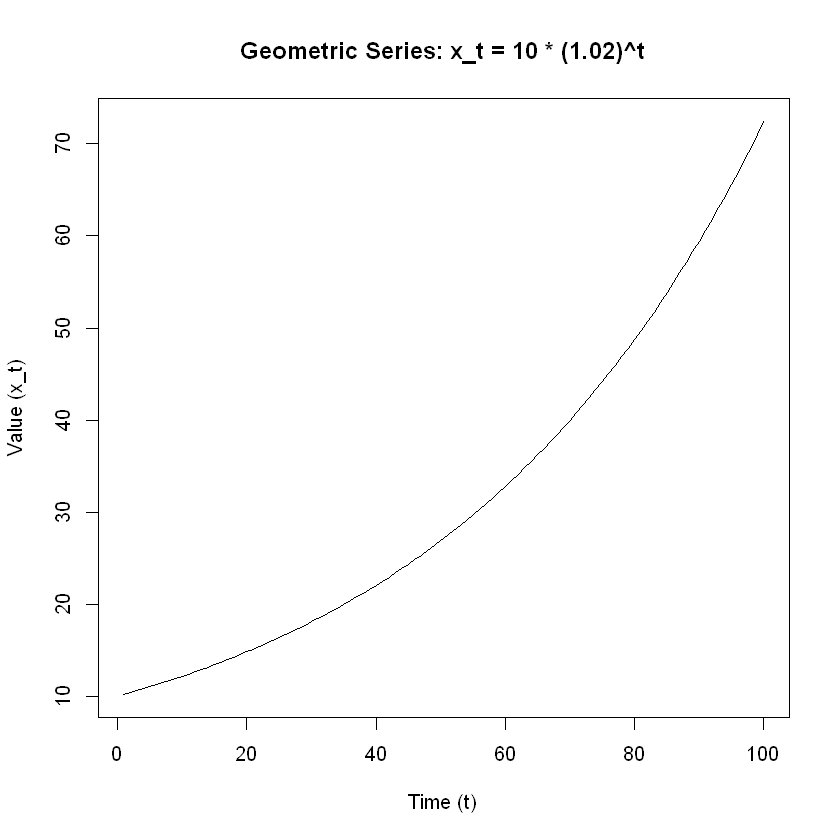

In [34]:
# Example: Creating a geometric series as mentioned in the notebook
# x_t = 10 * (1 + 0.02)^t

# Create time series data
t <- 1:100
x_t <- 10 * (1 + 0.02)^t

# Create a simple plot
plot(
     t, x_t, type = "l", 
     main = "Geometric Series: x_t = 10 * (1.02)^t", 
     xlab = "Time (t)", 
     ylab = "Value (x_t)"
     )

# Display first few values
head(tibble(Time = t, Value = x_t), 10)